# üìä Ulykkesanalyse basert p√• temperatur
Denne analysen unders√∏ker hvordan antall trafikkulykker varierer med temperaturforhold, basert p√• datasettene fra Statens vegvesen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Les inn datasett
df_temp = pd.read_csv("Ulykker_med_temp.csv", encoding="ISO-8859-1", delimiter=";")

# Rydd opp kolonnenavn
df_temp.columns = df_temp.columns.str.strip().str.replace("\n", "")
df_temp.rename(columns={
    "Kommune": "Kommune",
    "M√•ned": "M√•ned",
    "√Ör": "√Ör",
    "Kaldere enn - 5 grader": "Under -5¬∞C",
    "-5 t.o.m. 5 grader": "-5¬∞C til 5¬∞C",
    "Varmere enn 5 grader": "Over 5¬∞C"
}, inplace=True)


## Analyse 1: Totalt antall ulykker per temperaturintervall

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_28668\338970281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_summary_df, x="Temperaturintervall", y="Antall ulykker", palette="coolwarm")


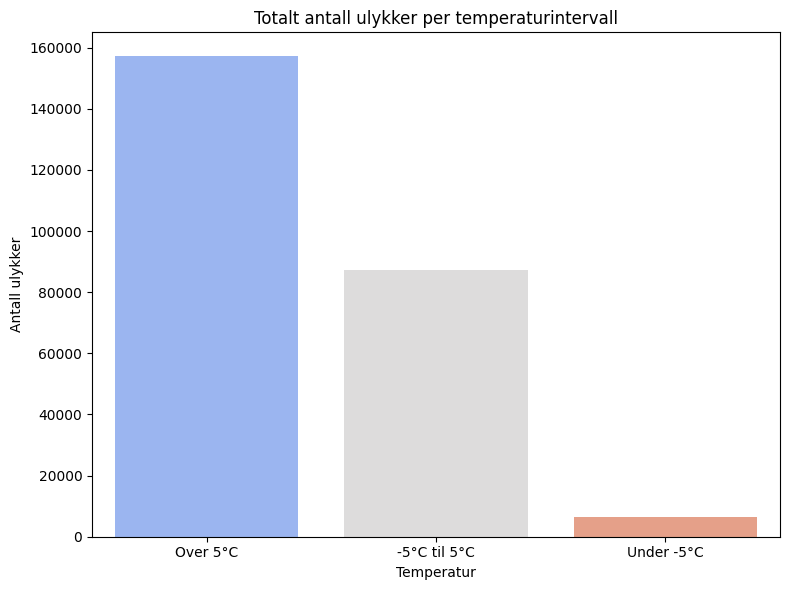

In [3]:
temp_summary = df_temp[["Under -5¬∞C", "-5¬∞C til 5¬∞C", "Over 5¬∞C"]].sum().sort_values(ascending=False)
temp_summary_df = temp_summary.reset_index()
temp_summary_df.columns = ["Temperaturintervall", "Antall ulykker"]

plt.figure(figsize=(8, 6))
sns.barplot(data=temp_summary_df, x="Temperaturintervall", y="Antall ulykker", palette="coolwarm")
plt.title("Totalt antall ulykker per temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xlabel("Temperatur")
plt.tight_layout()
plt.show()


**Observasjon:**
- **Flest ulykker skjer ved temperaturer over +5¬∞C.**
- Deretter f√∏lger intervallet **-5¬∞C til +5¬∞C**.
- F√¶rrest ulykker skjer ved temperaturer **under -5¬∞C**.

**Tolkning:**
- Den h√∏ye ulykkesraten ved **temperaturer over +5¬∞C** kan skyldes:
  - Mer trafikkaktivitet i milde og varme perioder (v√•r, sommer, h√∏st).
  - Flere myke trafikanter (fotgjengere, syklister) og h√∏yere fart.
- Intervallet **-5¬∞C til +5¬∞C** kan v√¶re preget av glatte og skiftende kj√∏reforhold (nullf√∏re), men gir likevel f√¶rre ulykker totalt.
- Ved **temperaturer under -5¬∞C** ser vi f√¶rrest ulykker, trolig fordi:
  - F√¶rre velger √• kj√∏re.
  - Bilf√∏rere er mer varsomme.
  - Vinterforholdene er mer stabile og forutsigbare.

## Analyse 2: Ulykker per temperaturintervall og m√•ned

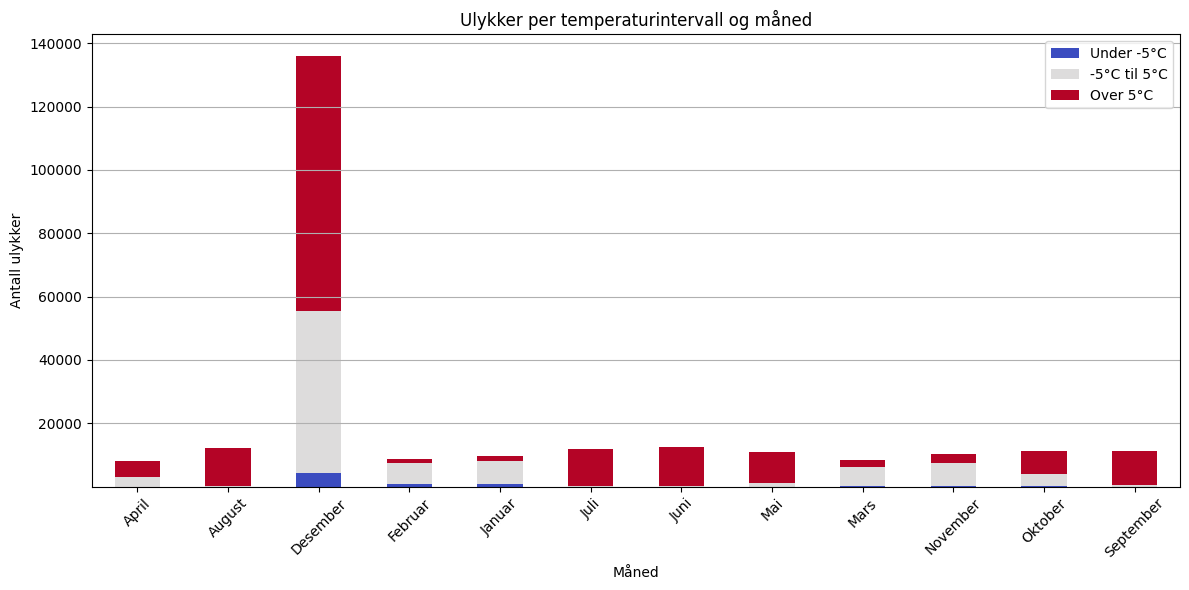

In [4]:
monthly_temp = df_temp.groupby("M√•ned")[["Under -5¬∞C", "-5¬∞C til 5¬∞C", "Over 5¬∞C"]].sum()

monthly_temp.plot(kind="bar", figsize=(12,6), stacked=True, colormap="coolwarm")
plt.title("Ulykker per temperaturintervall og m√•ned")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### üìä Ulykker per temperaturintervall og m√•ned

**Observasjon:**
- **Desember** har ekstremt mange ulykker ‚Äì spesielt i temperaturkategoriene **"-5¬∞C til 5¬∞C"** og **"Over 5¬∞C"**.
- Sommerm√•nedene (juni, juli, august) har ogs√• h√∏y andel ulykker i **"Over 5¬∞C"**.
- **Under -5¬∞C** er kun betydelig i vinterm√•nedene (desember‚Äìfebruar).

**Tolkning:**
- **Desember-effekten** kan skyldes:
  - √òkt biltrafikk i f√∏rjulstiden.
  - Nullf√∏re og skiftende v√¶rforhold.
  - M√∏rkere dager gir d√•rligere sikt.
- Det at mange ulykker skjer ved **over 5¬∞C** tyder p√• at **trafikkmengde og aktivitet** har stor betydning ‚Äì ikke bare v√¶ret.
- Kulde under **-5¬∞C** gir f√¶rre ulykker, trolig p√• grunn av redusert mobilitet og st√∏rre forsiktighet.


## Analyse 3: Topp 10 kommuner med flest temperaturrelaterte ulykker

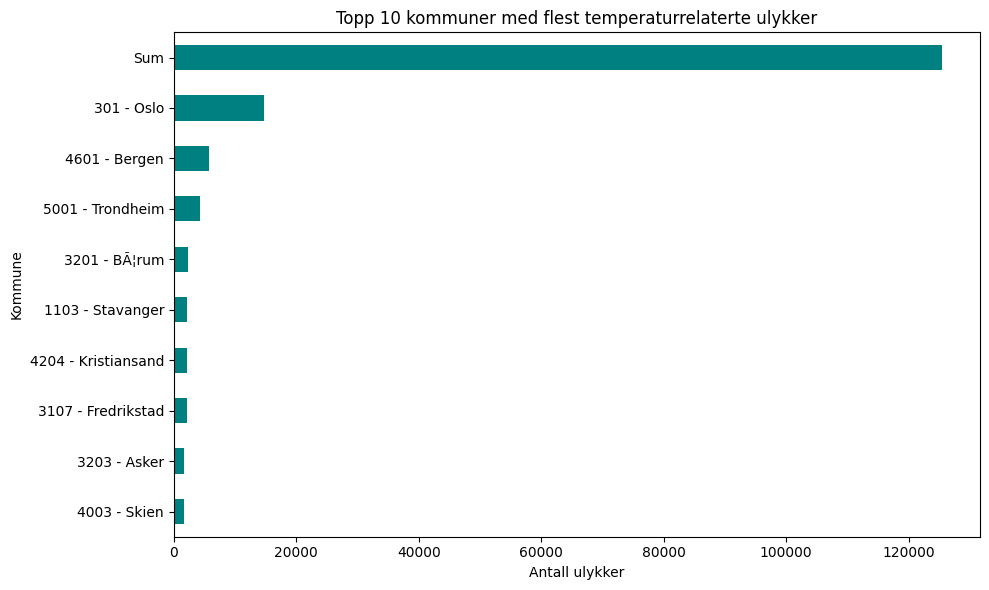

In [5]:
df_temp["Totalt"] = df_temp[["Under -5¬∞C", "-5¬∞C til 5¬∞C", "Over 5¬∞C"]].sum(axis=1)
kommune_temp = df_temp.groupby("Kommune")["Totalt"].sum().sort_values(ascending=False).head(10)

kommune_temp.plot(kind="barh", figsize=(10,6), color="teal")
plt.title("Topp 10 kommuner med flest temperaturrelaterte ulykker")
plt.xlabel("Antall ulykker")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### üèòÔ∏è Topp 10 kommuner med flest temperaturrelaterte ulykker

**Observasjon:**
- **Oslo** topper listen, etterfulgt av Bergen og Trondheim.
- Andre storbykommuner som Stavanger, Kristiansand og Fredrikstad er ogs√• blant topp 10.
- En rad med "Sum" vises i grafen ‚Äì den representerer totalen og b√∏r ignoreres i sammenligning.

**Tolkning:**
- **Tett befolkede byer** har naturlig flere ulykker p√• grunn av:
  - H√∏yere trafikkvolum.
  - Mer komplekse trafikkmilj√∏ (busser, fotgjengere, syklister, kollektivfelt).
- St√∏rre byer kan ogs√• ha st√∏rre variasjon i mikroklima og trafikkforhold.


## üîπ Analyse 4: Sesongbasert ulykkesanalyse per temperaturintervall

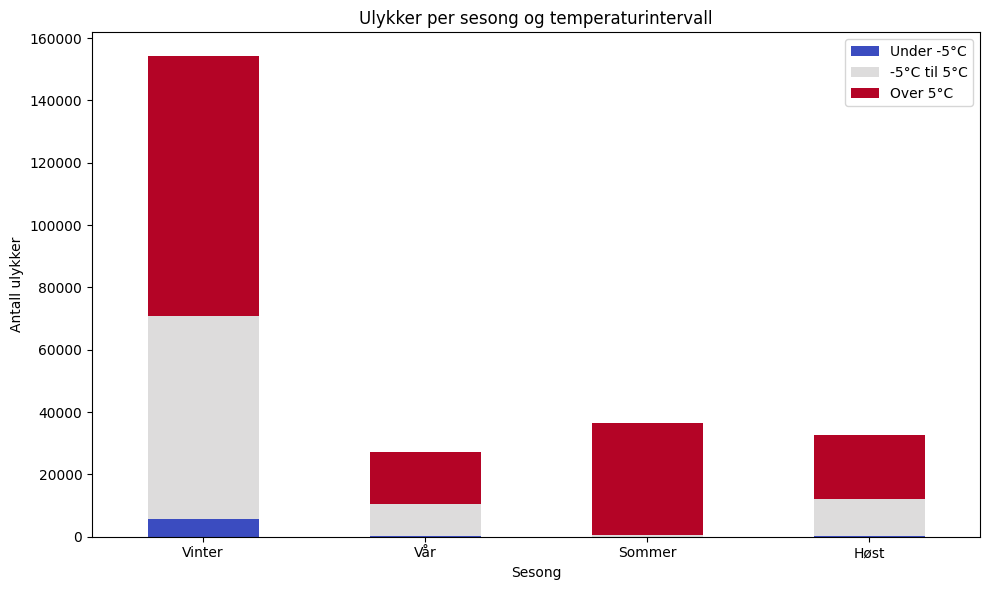

In [8]:
# Koble m√•ned til sesong
m√•ned_sesong = {
    "Januar": "Vinter", "Februar": "Vinter", "Desember": "Vinter",
    "Mars": "V√•r", "April": "V√•r", "Mai": "V√•r",
    "Juni": "Sommer", "Juli": "Sommer", "August": "Sommer",
    "September": "H√∏st", "Oktober": "H√∏st", "November": "H√∏st"
}
df_temp["Sesong"] = df_temp["M√•ned"].map(m√•ned_sesong)

# Summer ulykkene per sesong
sesong_data = df_temp.groupby("Sesong")[["Under -5¬∞C", "-5¬∞C til 5¬∞C", "Over 5¬∞C"]].sum()
sesong_data = sesong_data.reindex(["Vinter", "V√•r", "Sommer", "H√∏st"])

# Plot
sesong_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Ulykker per sesong og temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Tolkning:**  
- Vinteren har flest ulykker i kategoriene under 5¬∞C.
- Sommeren domineres av ulykker over 5¬∞C, som forventet.
- Nullf√∏re (mellom -5 og 5¬∞C) ser ut til √• v√¶re en risikofaktor b√•de h√∏st og vinter.


## üîπ Analyse 5: Utvikling over tid (1990‚Äì2023) per temperaturintervall

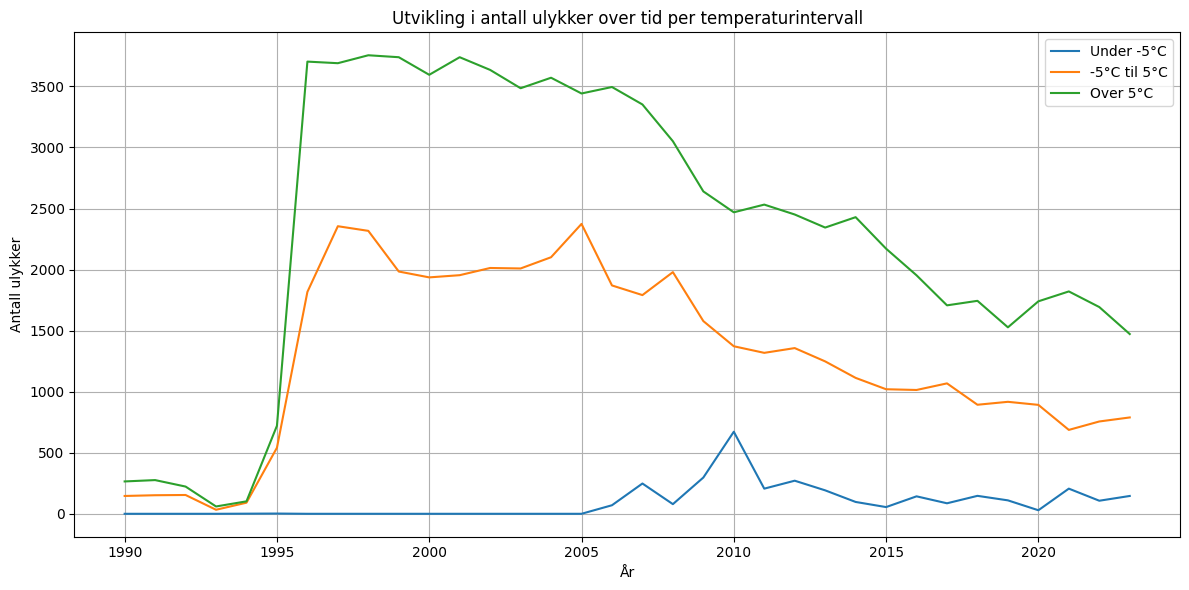

In [10]:
√•r_data = df_temp[df_temp["√Ör"] >= 1990].groupby("√Ör")[["Under -5¬∞C", "-5¬∞C til 5¬∞C", "Over 5¬∞C"]].sum()

√•r_data.plot(figsize=(12, 6))
plt.title("Utvikling i antall ulykker over tid per temperaturintervall")
plt.ylabel("Antall ulykker")
plt.xlabel("√Ör")
plt.grid(True)
plt.tight_layout()
plt.show()


**Tolkning:**  
- Totalt antall ulykker har variert over tid, men ser ut til √• ha √∏kt ved temperaturer over 5¬∞C.
- Dette kan skyldes √∏kt trafikk i varme m√•neder, urbanisering eller bedre registrering av ulykker.

## üßæ Konklusjon: Temperatur og ulykker

**Oppsummering:**
- Flest ulykker skjer ved **temperaturer over +5¬∞C**.
- **Desember** peker seg ut som den farligste m√•neden, trolig p√• grunn av kombinasjonen av v√¶r og h√∏y trafikk.
- Kuldegrader under **-5¬∞C** gir f√¶rre ulykker ‚Äì sannsynligvis p√• grunn av mer forsiktig kj√∏ring og lavere trafikkmengde.
- Storbykommuner dominerer statistikken over temperaturrelaterte ulykker.

**Tolkning:**
- Vinteren har flest ulykker i kategoriene under 5¬∞C.
- Sommeren domineres av ulykker over 5¬∞C, som forventet.
- Nullf√∏re (mellom -5 og 5¬∞C) ser ut til √• v√¶re en risikofaktor b√•de h√∏st og vinter.
- Totalt antall ulykker har variert over tid, men ser ut til √• ha √∏kt ved temperaturer over 5¬∞C.
- Dette kan skyldes √∏kt trafikk i varme m√•neder, urbanisering eller bedre registrering av ulykker.

### üìå Anbefalinger:
- √òkt trafikksikkerhetsfokus i **desember og vinterhalv√•ret**.
- Forebyggende tiltak mot ulykker i **nullf√∏re** og i **omr√•der med h√∏y trafikkmengde**.
- Informasjonskampanjer rettet mot trygg kj√∏ring i glatte forhold og m√∏rketid.

> Trafikkmengde, f√∏re og menneskelig atferd virker √• ha st√∏rre betydning for ulykkesrisiko enn temperatur alene.